# Load CoGo Status Stream files

In [154]:
%matplotlib inline

import matplotlib
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
import datetime
import math

import seaborn as sns
sns.set()

In [155]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [156]:
font = {'size'   : 50}
matplotlib.rc('font', **font)

LABEL_FONT_SIZE = 15
TITLE_FONT_SIZE = 25

## Import Data

In [165]:
print('Loading Status Data...')

try:
    file_path_slug = '../streamed_data/cogo/*station_status*.csv'

    # glob all files
    file_list = glob(file_path_slug)

    status_import = pd.DataFrame()
    status_import_chunks = []

    counter = 1

    # load data from each file
    for file in file_list:

        chunk_counter = 1
        chunksize = 10000
        num_chunks = math.ceil(sum(1 for row in open(file, 'r'))/chunksize)

        # import file in chunks
        for chunk in pd.read_csv(file, chunksize=chunksize, iterator=True):

            # append chunk to chunks list
            status_import_chunks.append(chunk)

            if chunk_counter == 1 or chunk_counter % math.ceil(num_chunks/10) == 0 or chunk_counter == num_chunks:
                print('\t[%s] finished chunk %s of %s' % (datetime.datetime.now().time(), chunk_counter, num_chunks))
            chunk_counter += 1
        
        print('Finished file! (%d of %d)' % (counter, len(file_list)))
        counter += 1
        
    status_import = pd.concat(status_import_chunks)
    print('Data Loaded Successfully!')

except:
    print('oops... something went wrong importing the data :(')
    

Loading Status Data...
	[14:31:51.213271] finished chunk 1 of 1
Finished file! (1 of 15)
	[14:31:51.220926] finished chunk 1 of 1
Finished file! (2 of 15)
	[14:31:51.230114] finished chunk 1 of 1
Finished file! (3 of 15)
	[14:31:51.241882] finished chunk 1 of 1
Finished file! (4 of 15)
	[14:31:51.250275] finished chunk 1 of 1
Finished file! (5 of 15)
	[14:31:51.256560] finished chunk 1 of 1
Finished file! (6 of 15)
	[14:31:51.262654] finished chunk 1 of 1
Finished file! (7 of 15)
	[14:31:51.270026] finished chunk 1 of 1
Finished file! (8 of 15)
	[14:31:51.279547] finished chunk 1 of 1
Finished file! (9 of 15)
	[14:31:51.287825] finished chunk 1 of 1
Finished file! (10 of 15)
	[14:31:51.293647] finished chunk 1 of 1
Finished file! (11 of 15)
	[14:31:51.298975] finished chunk 1 of 1
Finished file! (12 of 15)
	[14:31:51.305710] finished chunk 1 of 1
Finished file! (13 of 15)
	[14:31:51.319810] finished chunk 1 of 1
Finished file! (14 of 15)
	[14:31:51.324782] finished chunk 1 of 1
Finishe

In [166]:
status_import.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6440 entries, 0 to 459
Data columns (total 9 columns):
last_reported          6440 non-null object
is_installed           6440 non-null int64
is_renting             6440 non-null int64
is_returning           6440 non-null int64
num_bikes_available    6440 non-null int64
num_bikes_disabled     6440 non-null int64
num_docks_available    6440 non-null int64
num_docks_disabled     6440 non-null int64
station_id             6440 non-null int64
dtypes: int64(8), object(1)
memory usage: 503.1+ KB


In [167]:
status_import.drop_duplicates(inplace=True)

In [168]:
status_import.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 708 entries, 0 to 85
Data columns (total 9 columns):
last_reported          708 non-null object
is_installed           708 non-null int64
is_renting             708 non-null int64
is_returning           708 non-null int64
num_bikes_available    708 non-null int64
num_bikes_disabled     708 non-null int64
num_docks_available    708 non-null int64
num_docks_disabled     708 non-null int64
station_id             708 non-null int64
dtypes: int64(8), object(1)
memory usage: 55.3+ KB


In [169]:
status_import.rename(columns={'last_reported': 'time'}, inplace=True)
status_import.set_index('time', inplace=True)

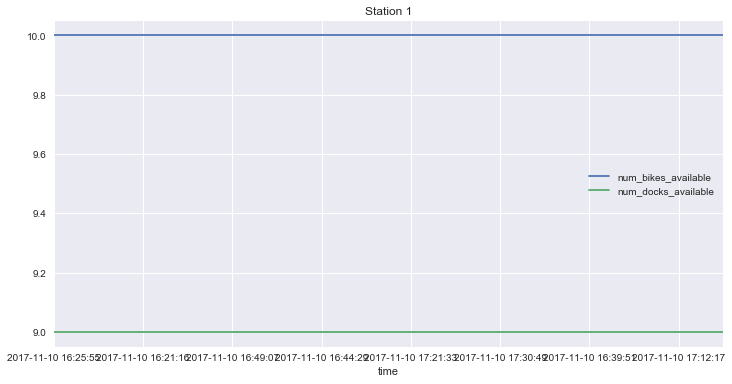

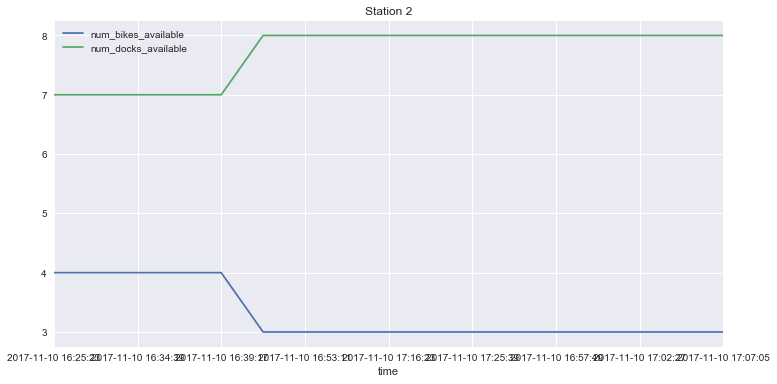

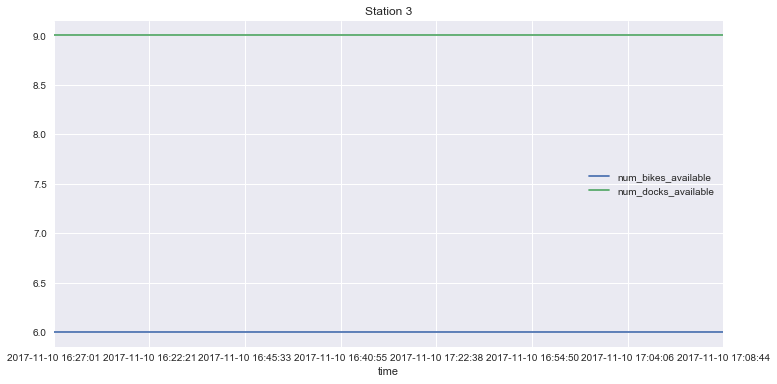

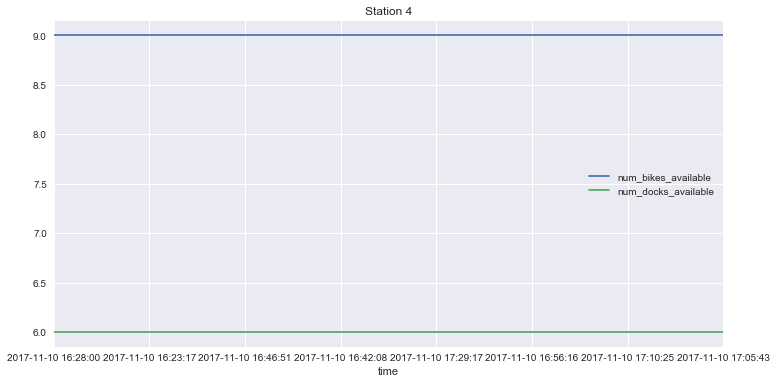

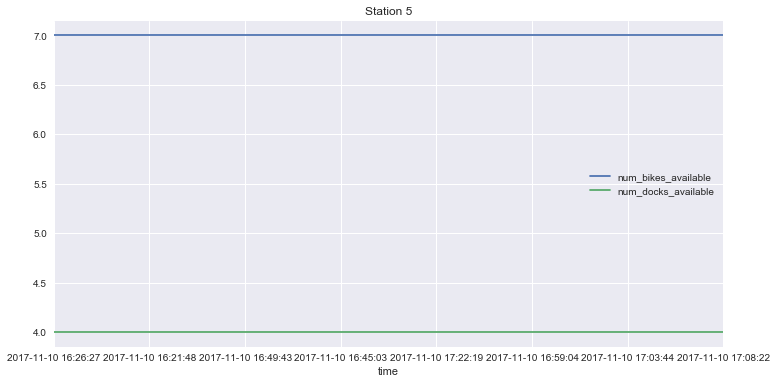

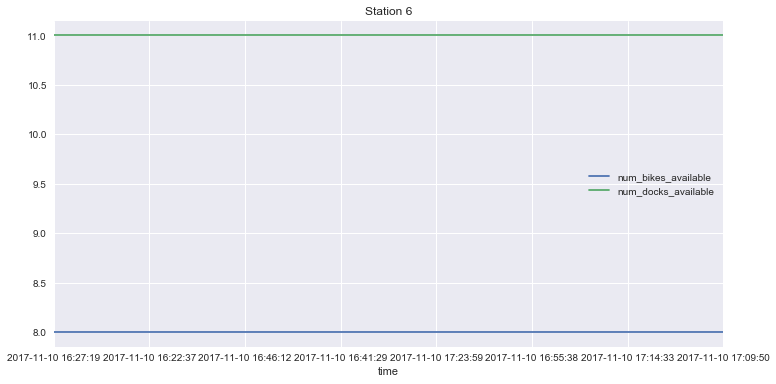

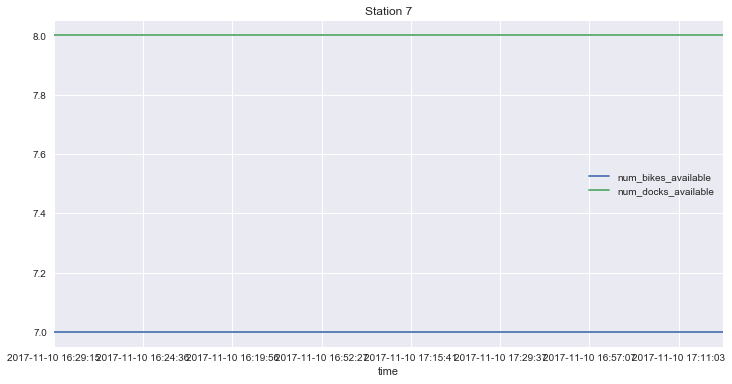

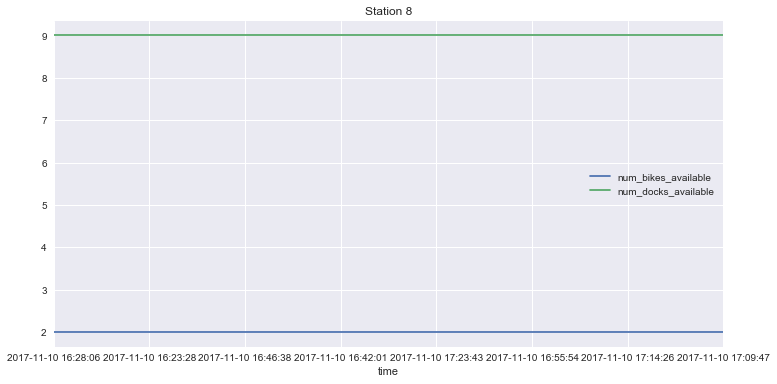

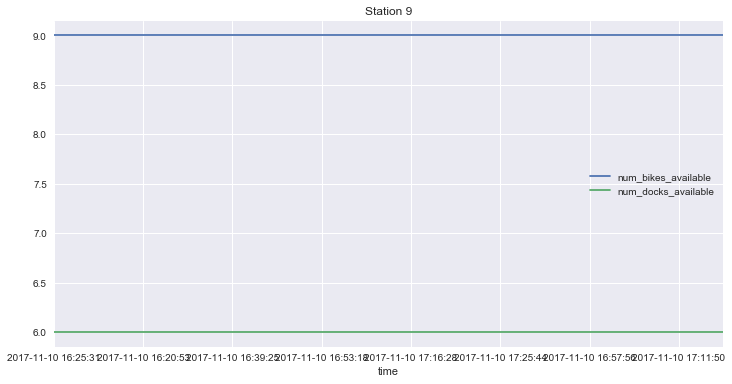

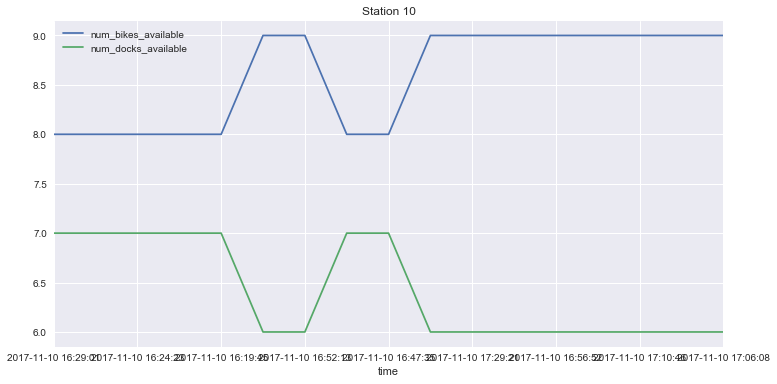

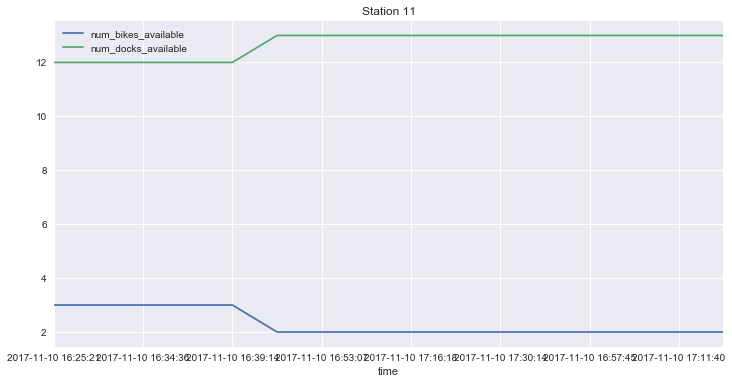

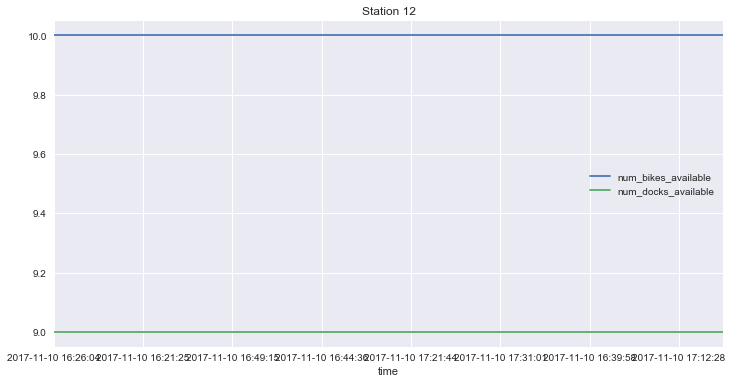

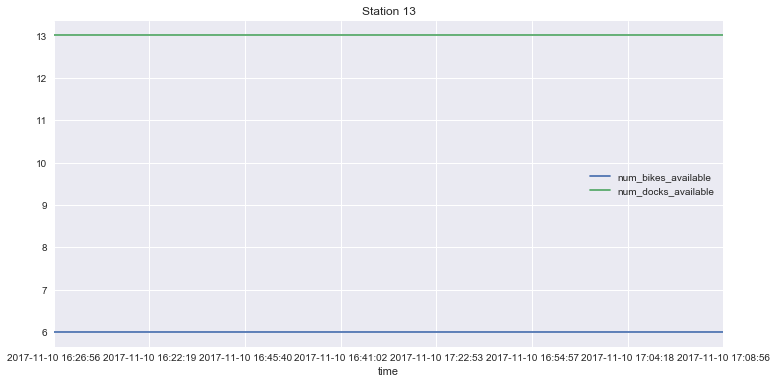

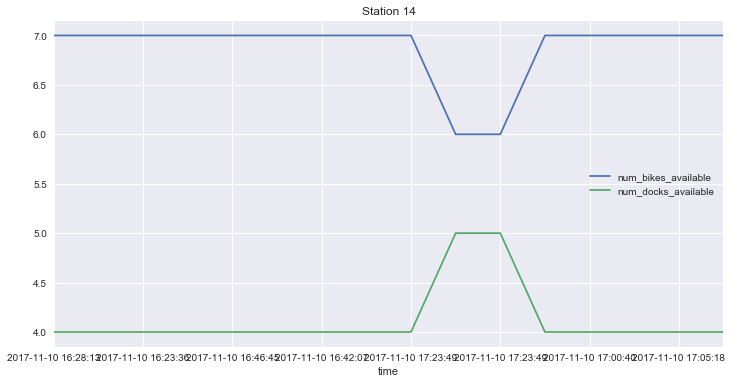

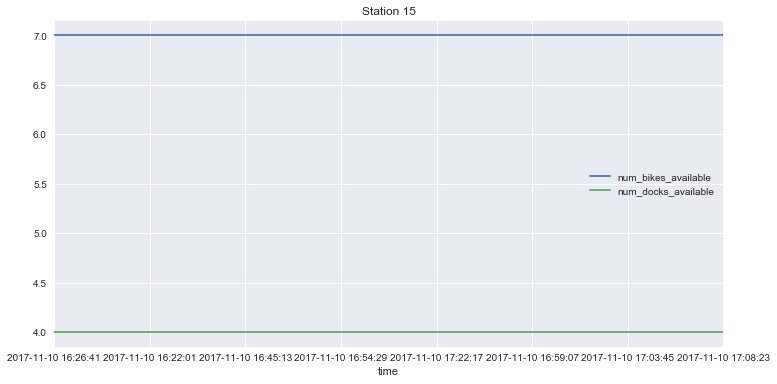

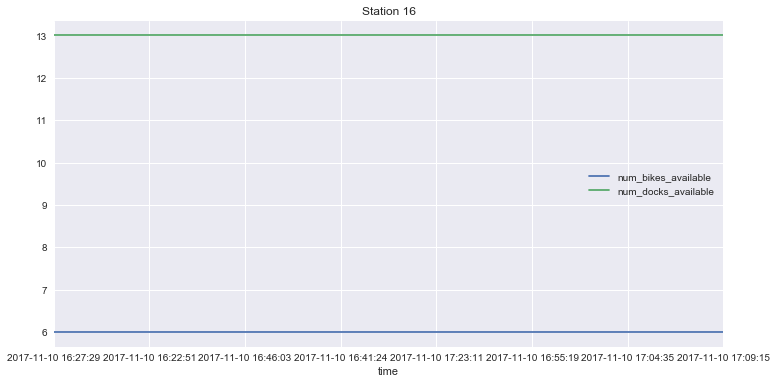

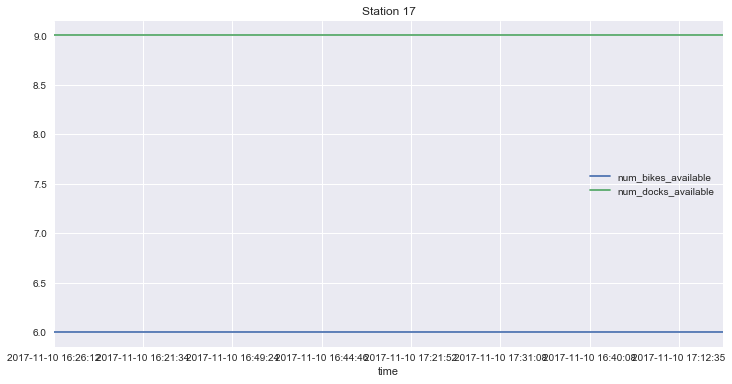

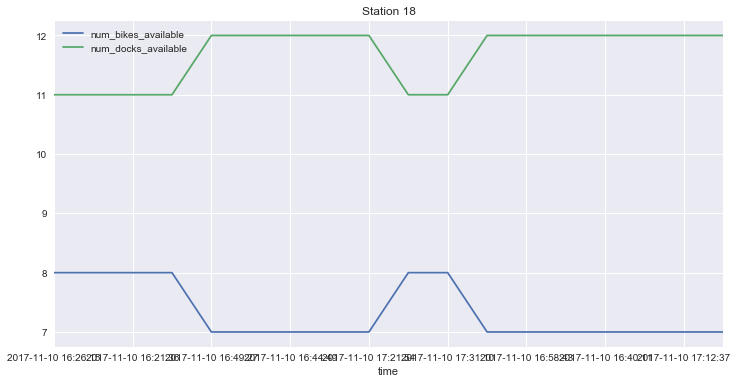

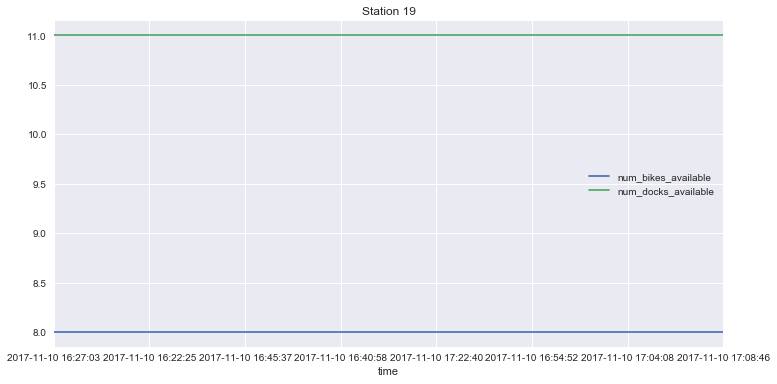

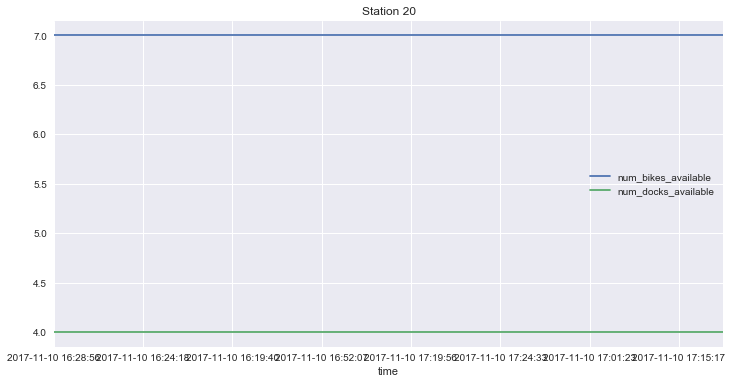

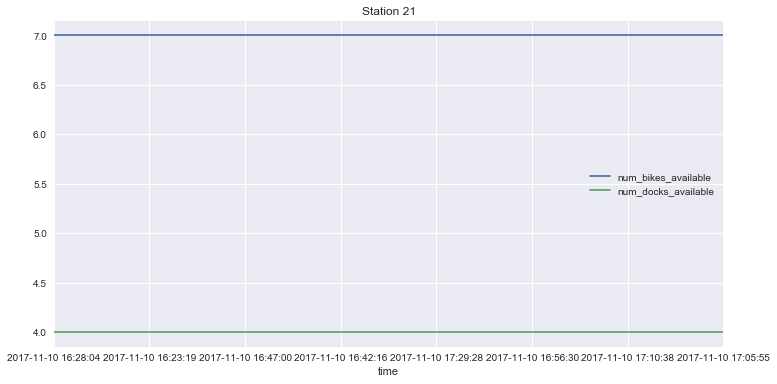

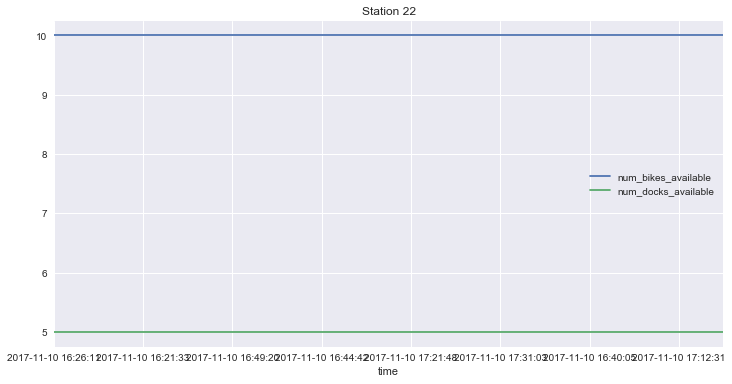

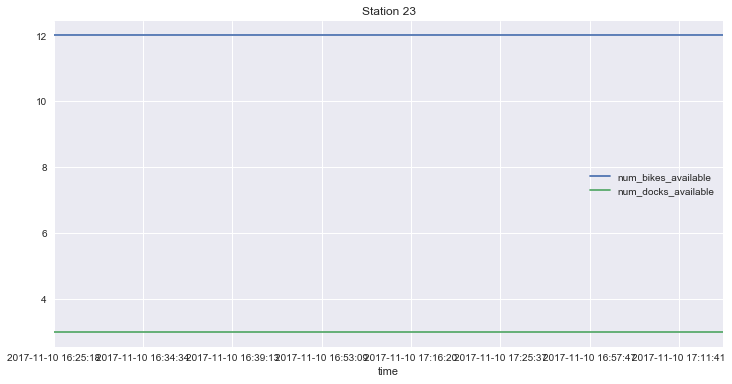

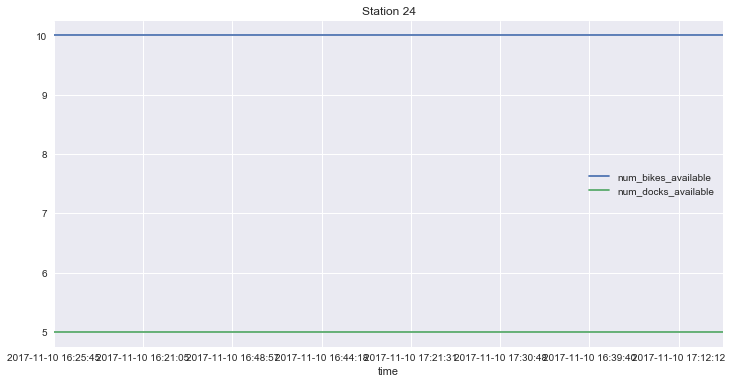

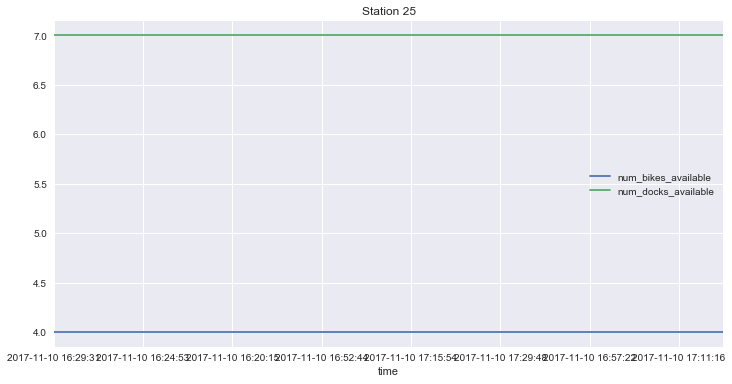

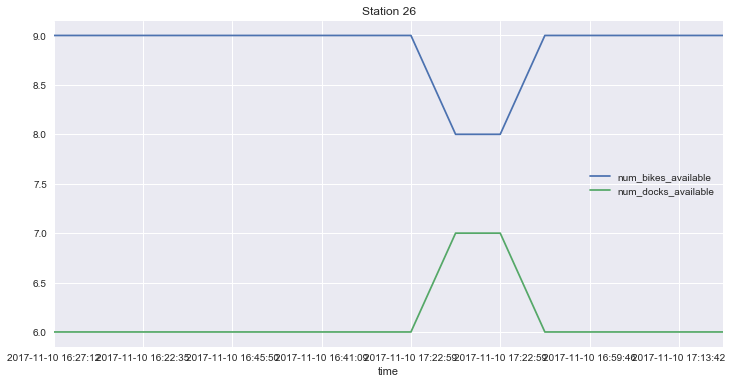

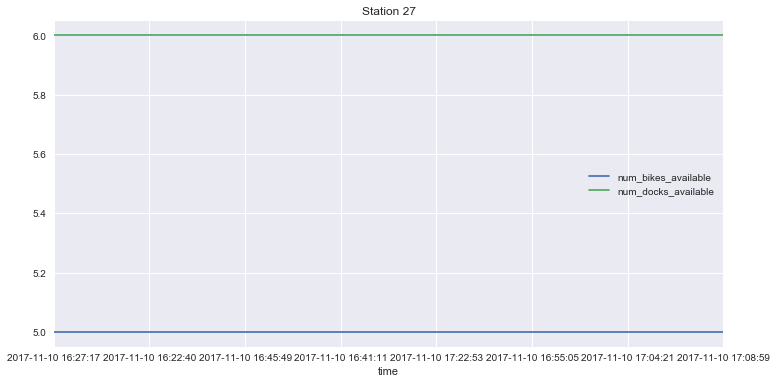

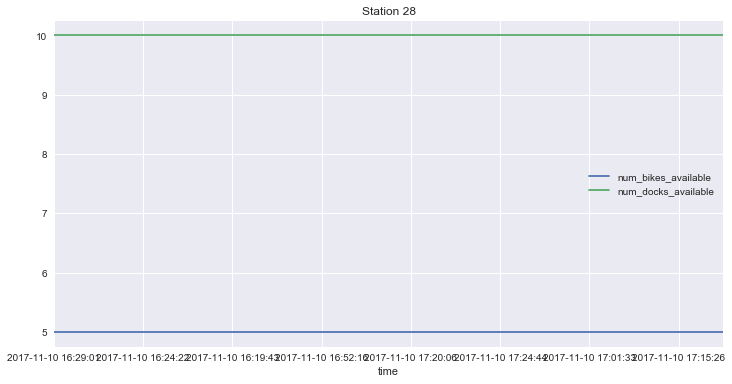

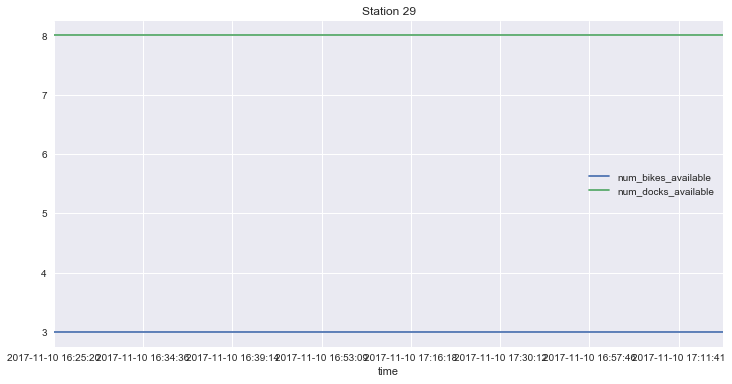

/Users/samgutentag/anaconda/envs/springboard/lib/python3.6/site-packages/matplotlib/axes/_base.py:2918: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))


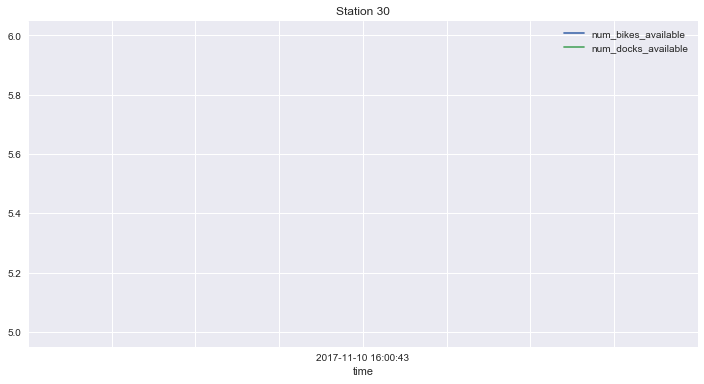

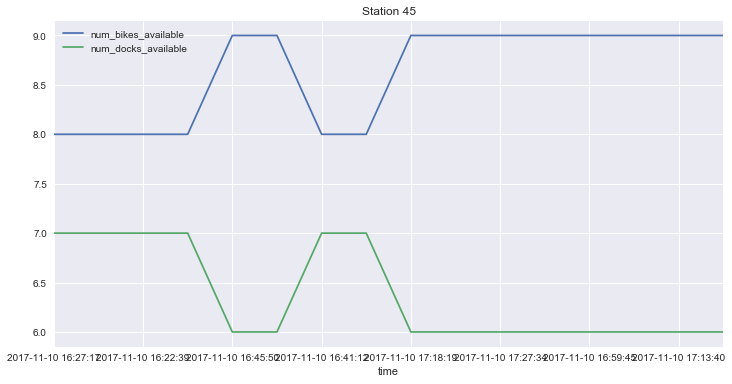

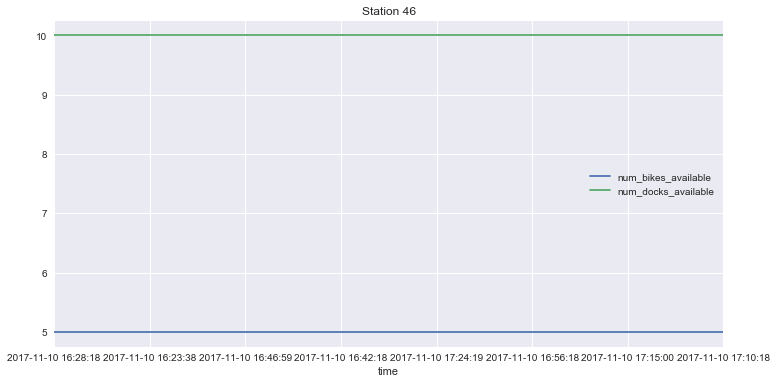

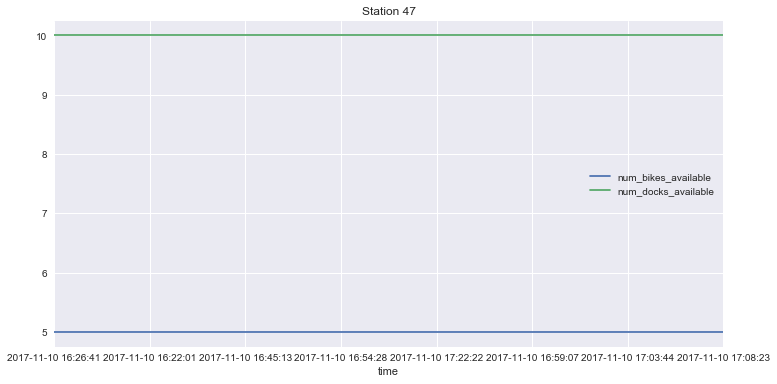

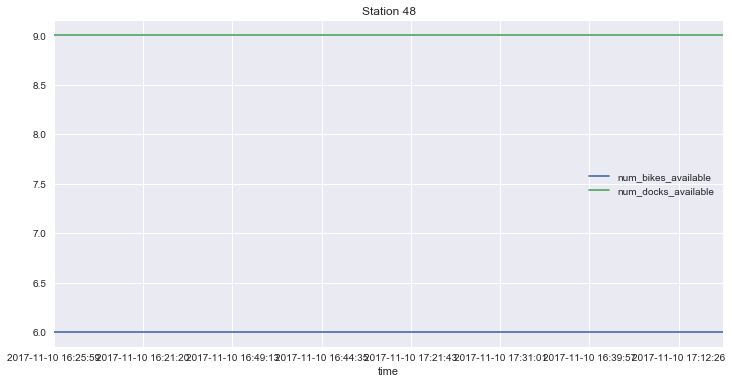

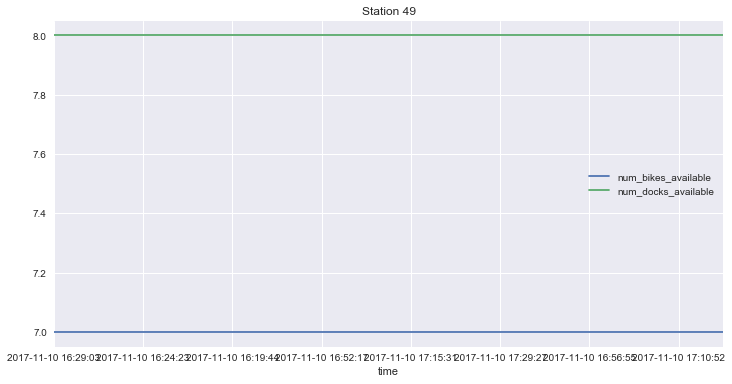

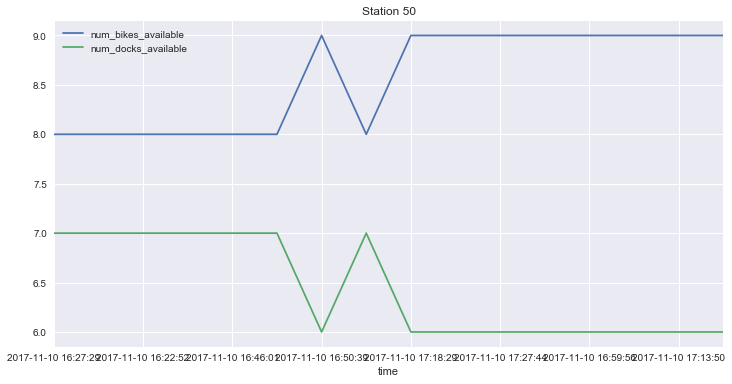

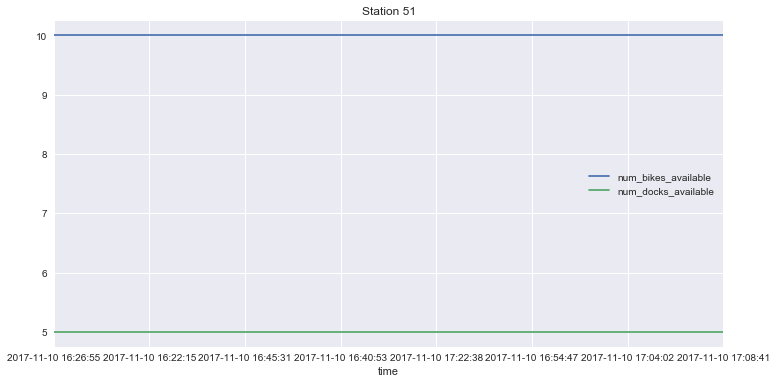

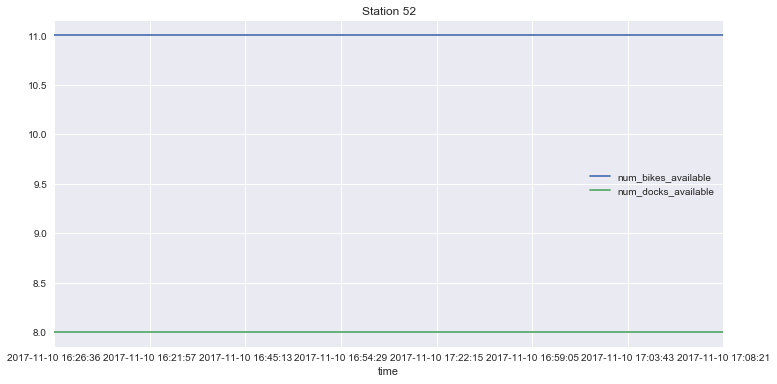

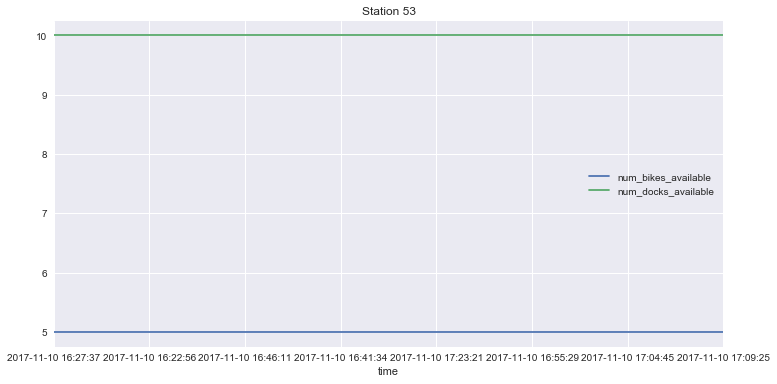

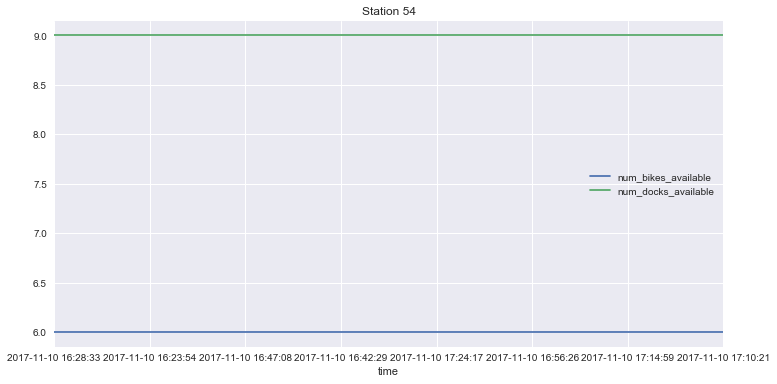

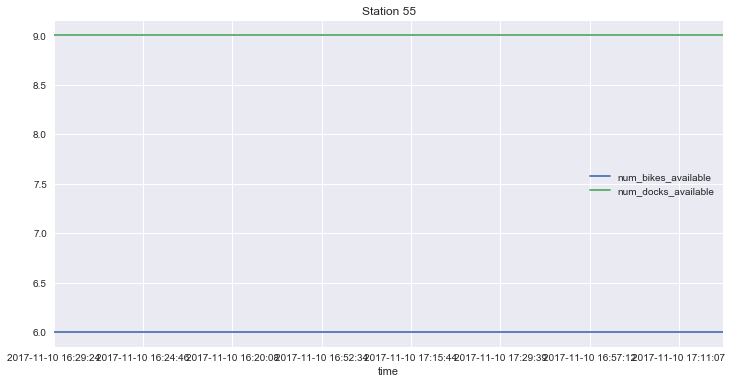

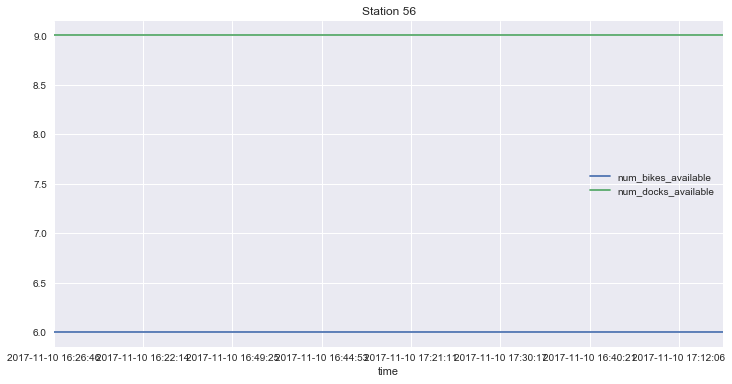

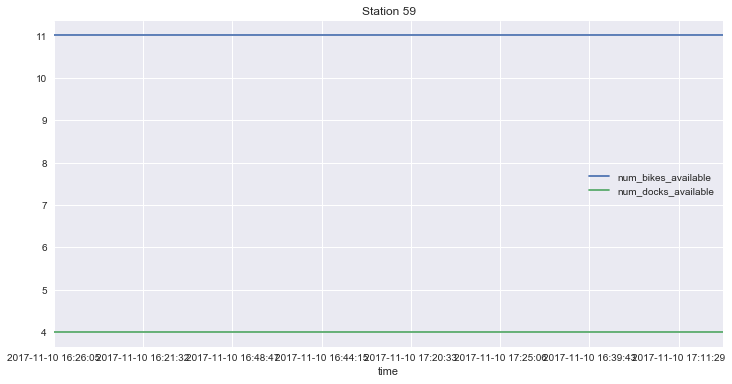

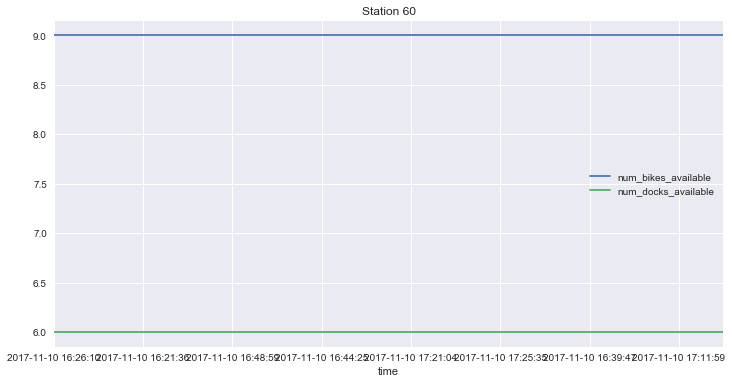

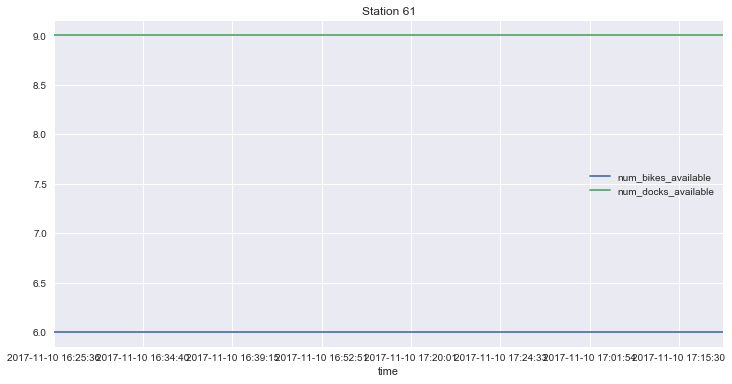

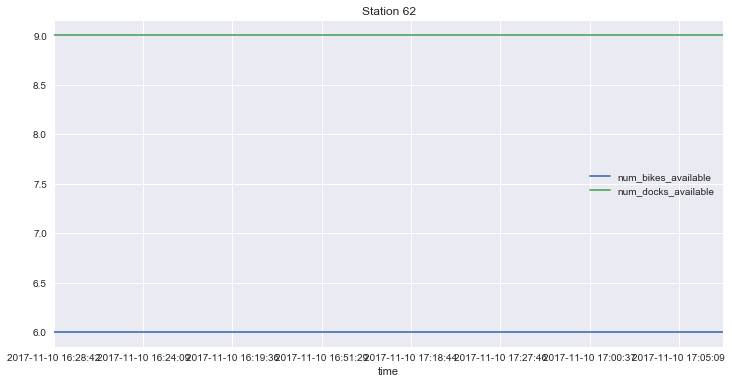

In [178]:
for i in sorted(pd.unique(status_import.station_id)):
    status_import[status_import.station_id == i][['num_bikes_available', 'num_docks_available']].plot(figsize=(12,6))
    title = 'Station %s' % i
    plt.title(title)
    plt.show()